#  <div align = 'center' > DATA SCIENTIST SALARIES (EDA)

## Data Libraries

In [3]:
#Data Analysis Libraries for Manipulation
import pandas as pd
import numpy as np

#Data Visualisation Libraries for Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Date and Time Maniupukation
from datetime import datetime as dt

## Data Importation

In [4]:
df_salaries = pd.read_csv(r'C:\Users\User\Dropbox\My PC (9470m)\Desktop\Data Science\Internship\ds_salaries.csv')

## Data Inspection

In [5]:
df_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Feature Description
1.  **work_year:** The year the salary was paid
2.  **experience_level:** The experience level in the job during the year with the following possible values: 
    * EN Entry-level
    * Junior MI Mid-level
    * Intermediate SE Senior-level
    * Expert EX Executive-level
    * Director
    
    
3.  **employment_type:** The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
4.  **job_title:** The role worked in during the year
5.  **salary:** The total gross salary amount paid.
6.  **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
7.  **salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)   
8.  **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code
9.  **remote_ratio:** The overall amount of work done remotely, possible values are as follows:
    * 0 - No remote work (less than 20%)
    * 50 - 50% remote 
    * 100 - 100% remote (more than 80%)
    
    
10. **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code
11. **company_size:** The average number of people that worked for the company during the year:
    * S less than 50 employees (small) 
    * M 50 to 250 employees (medium) 
    * L more than 250 employees (large)

In [6]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
df_salaries.shape

(607, 12)

In [8]:
df_salaries.isnull().any()

Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

## Univariate Analysis
1. Categorical Columns
    * Experience Level
    * Job Titles
    * Employment Type
    * Employee Residence & Company Location
    * Company Size
    
    
2. Numerical Columnns
    * Work Year
    * Salary in USD
    * Remote Ratio

#### Experience Level

In [9]:
df_salaries.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

Text(0.5, 0, 'Experience Level')

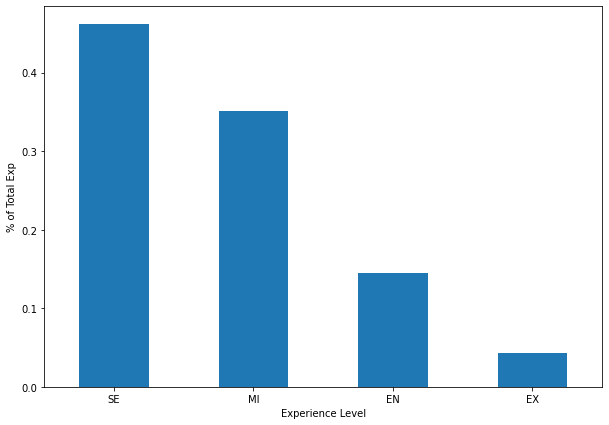

In [52]:
df_salaries.experience_level.value_counts(normalize=True).plot.bar(rot=0, figsize = (10,7))
plt.ylabel('% of Total Exp')
plt.xlabel ('Experience Level')

The number experience holders are highest at Senior Level with a count of 280. This is closely followed by Mid-Level experience with a count of 213, which is more than double that of Entry level that has a count of 88 and of course Executive level which has a count of 26.

#### Job Title

In [11]:
df_salaries.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Data Analytics Manager                        7
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
BI Data Analyst                               6
Lead Data Engineer                            6
Computer Vision Engineer                      6
ML Engineer                                   6
Head of Data                                  5
Business Data Analyst                         5
Data Engineering Manager                

Text(0.5, 1.0, 'Count of Most Common Job Titles')

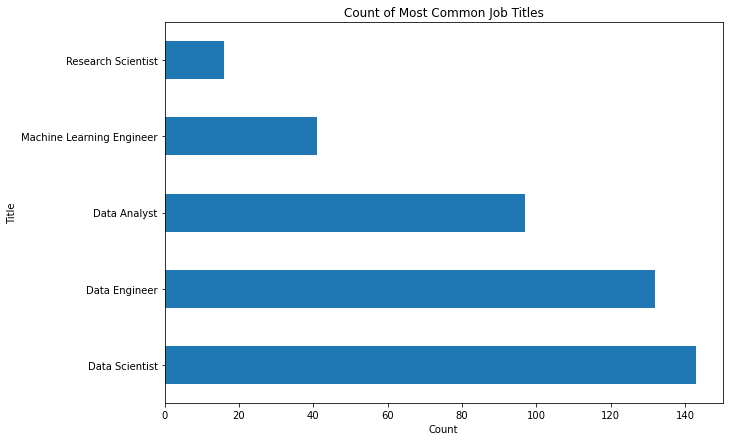

In [54]:
df_salaries.job_title.value_counts().nlargest(5).plot(kind = "barh", figsize = (10,7))
plt.ylabel ('Title')
plt.xlabel ('Count')
plt.title('Count of Most Common Job Titles')

The most common Job Title is that of a Data Scientist and this is closely followed by Data Engineer and Data Analyst.

#### Employment Type

In [13]:
df_salaries.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [14]:
df_salaries.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Text(0, 0.5, 'Count')

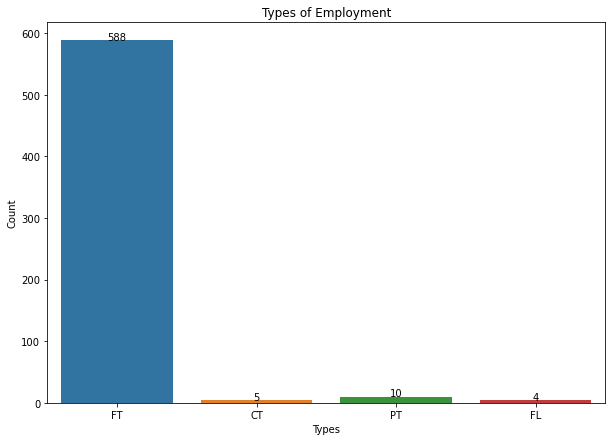

In [15]:
plt.figure(figsize=(10,7))
plt.title('Types of Employment')
viz = sns.countplot(x='employment_type', data=df_salaries)
viz.set_xticklabels(viz.get_xticklabels())
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    

plt.xlabel('Types')
plt.ylabel('Count')
#FT - Fulltime
#CT- Contract
#PT - Part Time
#FL - Freelance

Most hires are in full-time employment, with part-time employment being very far behind.

#### Employee Residence

In [16]:
df_salaries.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [17]:
df_salaries.employee_residence.value_counts().nlargest(30)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
RU      4
IT      4
VN      3
AE      3
AT      3
TR      3
AU      3
SG      2
BE      2
NG      2
RO      2
HU      2
MX      2
DK      2
SI      2
BG      1
Name: employee_residence, dtype: int64

A majority of the hires reside in the USA. The remaining countries in the top five are the UK, India, Canada and Denmark. 

#### Company Location

In [18]:
df_salaries.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [19]:
df_salaries.company_location.value_counts().nlargest(30)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PL      4
PT      4
AT      4
NL      4
AU      3
BR      3
LU      3
AE      3
TR      3
PK      3
MX      3
DK      3
NG      2
BE      2
CN      2
IT      2
SI      2
CH      2
CZ      2
RU      2
VN      1
Name: company_location, dtype: int64

Just like with employee residence, the majority of companies are located in the USA. The remaining countries in the top five are the UK, India, Canada and Denmark.

#### Company size

In [20]:
df_salaries.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

Text(0, 0.5, 'Count')

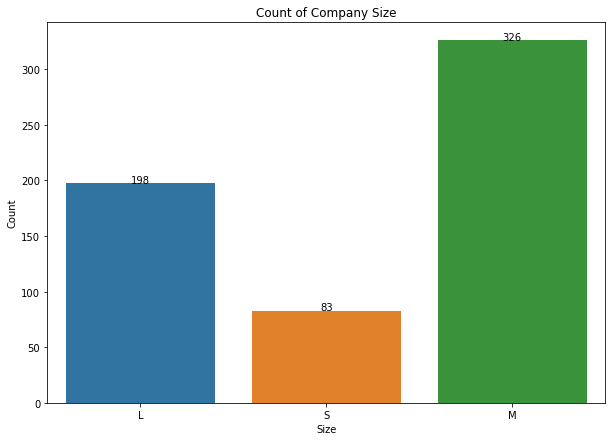

In [21]:
plt.figure(figsize=(10,7))
plt.title('Count of Company Size')
viz = sns.countplot(x='company_size', data=df_salaries)
viz.set_xticklabels(viz.get_xticklabels())
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    
plt.xlabel('Size')
plt.ylabel('Count')

#L - Large
#M - Medium
#S - Small

There are more data roles in Medium size companies than any other and this is followed by Large companies who hire a little above half the number in Medium sized companies. 

#### Work Year

In [22]:
df_salaries.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Text(0.5, 1.0, 'Count per Work Year')

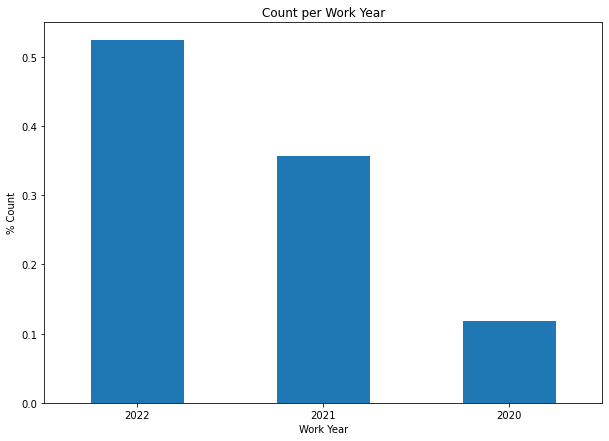

In [55]:
df_salaries.work_year.value_counts(normalize=True).plot.bar(stacked=True, rot=0, figsize = (10,7))
plt.ylabel('% Count')
plt.xlabel ('Work Year')
plt.title ('Count per Work Year')

More Salries were paid in 2022 than any other year.

#### Salaries in Dollars

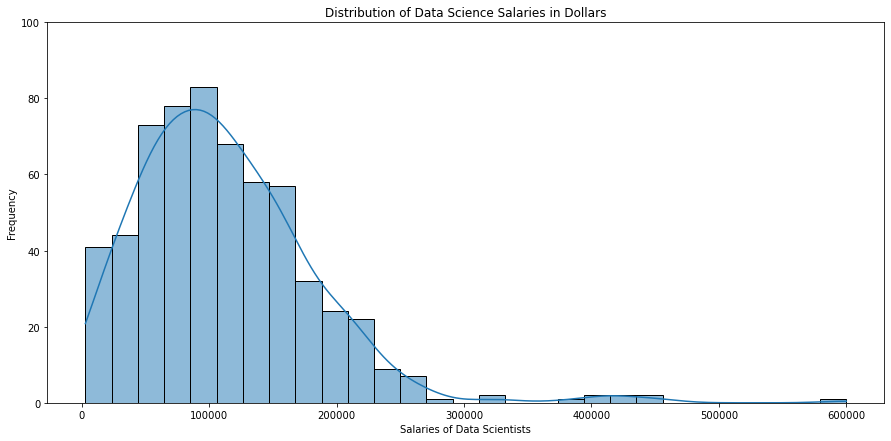

In [24]:
plt.figure(figsize=(15,7))
plt.title('Distribution of Data Science Salaries in Dollars')
plt.ylim(0,100)
plt.xlabel('Salaries of Data Scientists')
plt.ylabel('Frequency')
sns.histplot(data=df_salaries,x='salary_in_usd',kde=True)
plt.show()

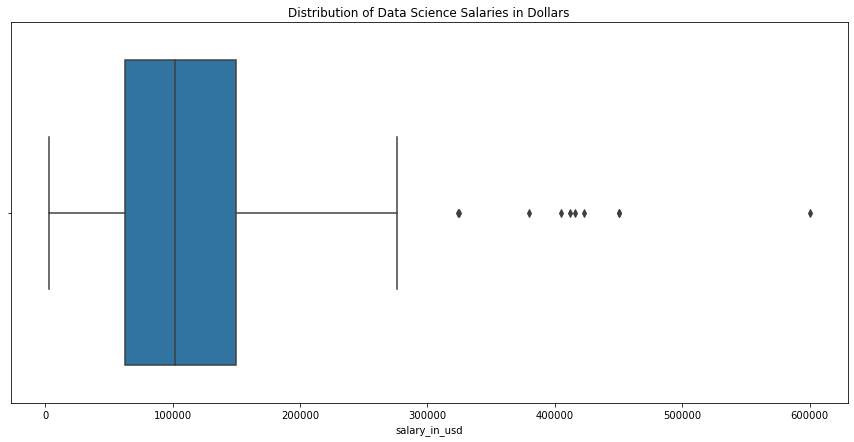

In [25]:
plt.figure(figsize=(15,7))
plt.title('Distribution of Data Science Salaries in Dollars') 
plt.xlabel('Salaries of Data Scientists')
sns.boxplot(data=df_salaries,x='salary_in_usd')
plt.show()

From both charts, we can see that a majority of the salaries received are around 100,000USD with outliers as high as 600,000USD.

#### Remote Ratio

In [26]:
df_salaries.remote_ratio.replace (0 , 'No remote work', inplace = True)
df_salaries.remote_ratio.replace (50 , '50% Remote', inplace = True)
df_salaries.remote_ratio.replace (100 , '100% Remote', inplace = True)

In [27]:
df_salaries.remote_ratio. value_counts()

100% Remote       381
No remote work    127
50% Remote         99
Name: remote_ratio, dtype: int64

Text(0, 0.5, 'Count')

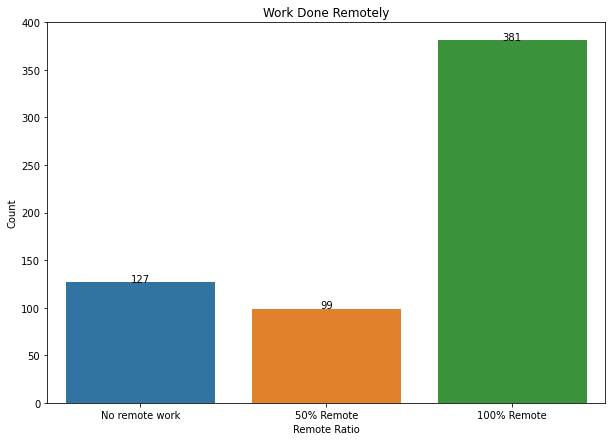

In [28]:
plt.figure(figsize=(10,7))
plt.title('Work Done Remotely')
viz = sns.countplot(x='remote_ratio', data=df_salaries)
viz.set_xticklabels(viz.get_xticklabels())
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    
plt.xlabel('Remote Ratio')
plt.ylabel('Count')

Most data hires work fully remote and this is followed by those who do not work remotely at all. Hybrid situations are the least of the three.

## Bivariate Analysis

1. Work Year Analysis
   - Remote Ratio by Work Year
   
   
2. Experience Level Analysis
   - Employment Type by Experience Level
   - Top 3 Job Title by Experience Level
   - Company Size by Experience Level
   
 
3. Company Location Analysis
	- Experience Level
    
    
4. Salary Analysis
    - Salary by work year
    - Salary by Experience Level
    - Salary by Company Size
    - Highest salaries by job title
    - Average Salary by Company Location

#### Work Year Analysis

Text(0, 0.5, 'Count')

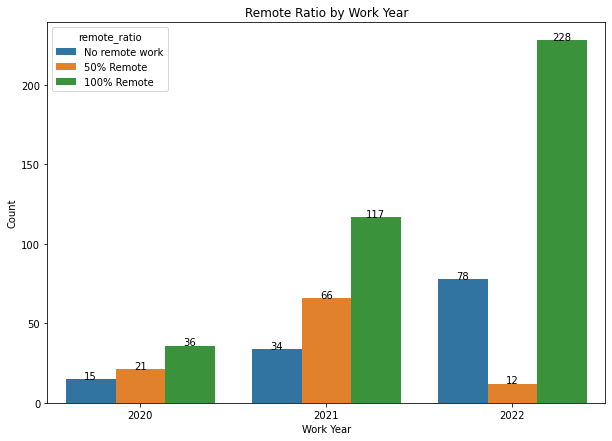

In [32]:
plt.figure(figsize=(10,7))
plt.title('Remote Ratio by Work Year')
viz = sns.countplot(x='work_year', data=df_salaries, hue = 'remote_ratio')
viz.set_xticklabels(viz.get_xticklabels())
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")

plt.xlabel('Work Year')
plt.ylabel('Count')

We can see that the number of remote roles grew by over 50% from 2021 to 2022 as more people moved from a hybrid role into a fully remote role. Ironically, we can also see a steady rise in fully on-site roles year on year. However, they are much smaller than the number of remote roles in each year.

#### Expereince level Analysis

Text(0.5, 0, 'Employment Type')

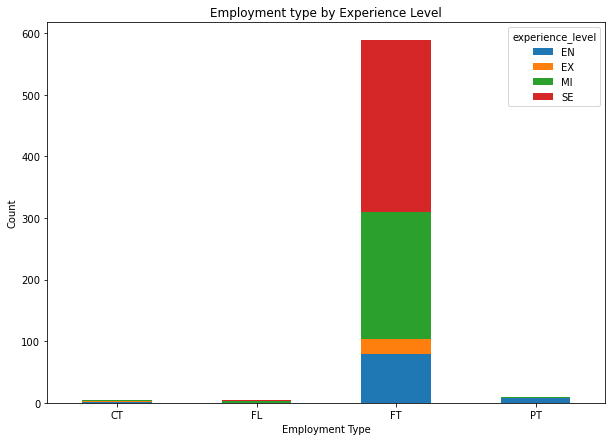

In [64]:
exp_pivot = pd.crosstab(df_salaries.employment_type,df_salaries.experience_level)
exp_pivot.plot.bar(stacked=True, rot=0, figsize = (10,7))
plt.title('Employment type by Experience Level')
plt.ylabel ('Count')
plt.xlabel('Employment Type')

As shown earlier, most data hires are in full-time employment and a majority of them are Senior Experienced individuals. It can also be seen that majority of the part-time hires happen to be at Entry-level experience.

#### Company Size Analysis

<AxesSubplot:xlabel='experience_level', ylabel='Count'>

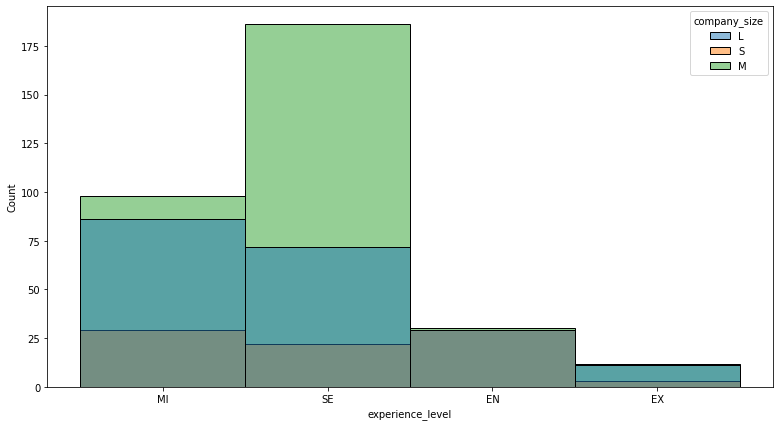

In [44]:
plt.figure(figsize=(13,7))
sns.histplot(x='experience_level', data=df_salaries, hue = 'company_size')

As shown earlier, there are more Medium sized companies hiring for data roles. Amongst the experience levels, these companies hire Senior Experienced individuals the most and this is closly followed by Mid-Level hires. It can be deduced that Entry-Level hires are mainly found in Smaller sized companies and this would make sense as to why they are significantly paid less.

#### Job Title Analysis (Top 3 by Experience Level)

In [83]:
p=pd.crosstab(df_salaries.job_title,df_salaries.experience_level).sort_values(by='job_title',ascending=False)
p.iloc[[27,32,37],:]

experience_level,EN,EX,MI,SE
job_title,,,,
Data Scientist,22,0,60,61
Data Engineer,12,4,53,63
Data Analyst,12,2,29,54


Text(0, 0.5, 'Count')

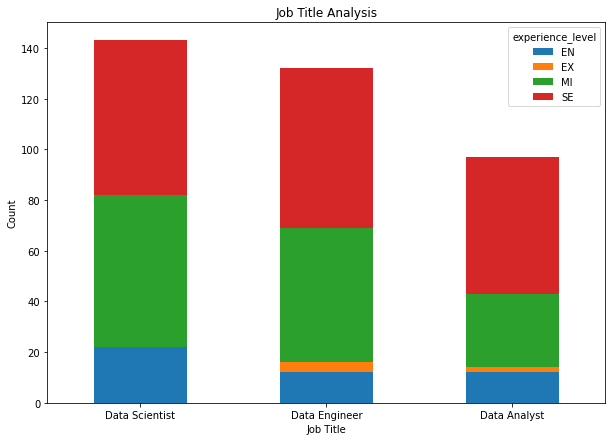

In [85]:
p=pd.crosstab(df_salaries.job_title,df_salaries.experience_level).sort_values(by='job_title',ascending=False). nlargest(3, df_salaries.experience_level)
p.plot.bar(stacked=True, rot=0, figsize = (10,7))
plt.title ('Job Title Analysis')
plt.xlabel('Job Title')
plt.ylabel('Count')

Experience levels are distributed amongst Data Science, Data Engineer and Data Analyst titles almost evenly. However, we do not see any Executive level hires in the Data Scientist role.

#### Company Location Analysis

In [90]:
df_salaries.company_location.value_counts().nlargest(5)

US    355
GB     47
CA     30
DE     28
IN     24
Name: company_location, dtype: int64

Text(0, 0.5, 'Count')

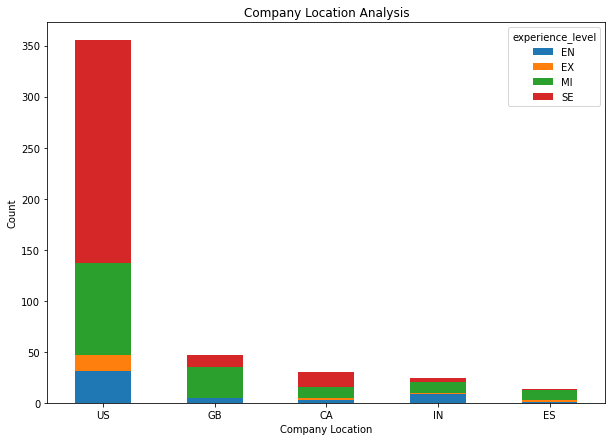

In [96]:
r=pd.crosstab(df_salaries.company_location,df_salaries.experience_level).sort_values(by='company_location',ascending=False). nlargest(5, df_salaries.experience_level)
r.plot.bar(stacked=True, rot=0, figsize = (10,7))
plt.title ('Company Location Analysis')
plt.xlabel('Company Location')
plt.ylabel('Count')

Senior Level Experience are  most frequent amongst data hires and they are mainly found in the United States. They can also be found the the United Kingdom and Canada in much smaller amounts. Mid-Level expereince is the second most frequent amongst data hires and they can be found in all of the top 5 countries but more consentrated in the US and the UK.

#### Work Year Analysis 

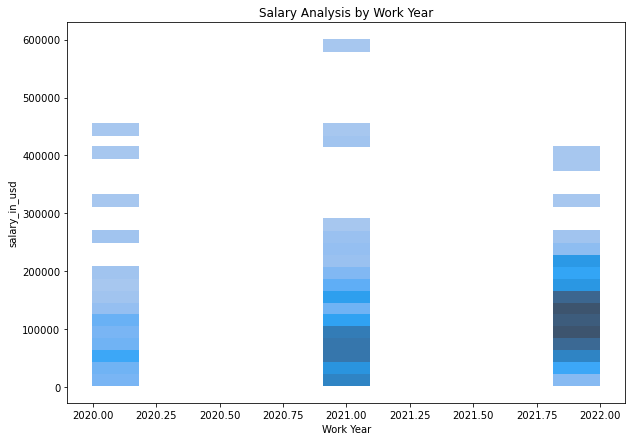

In [110]:
plt.figure(figsize=(10,7))
sns.histplot(data=df_salaries,x='work_year',y='salary_in_usd')
plt.xlabel('Work Year')
plt.title('Salary Analysis by Work Year')
plt.show()

#### Salary Analysis

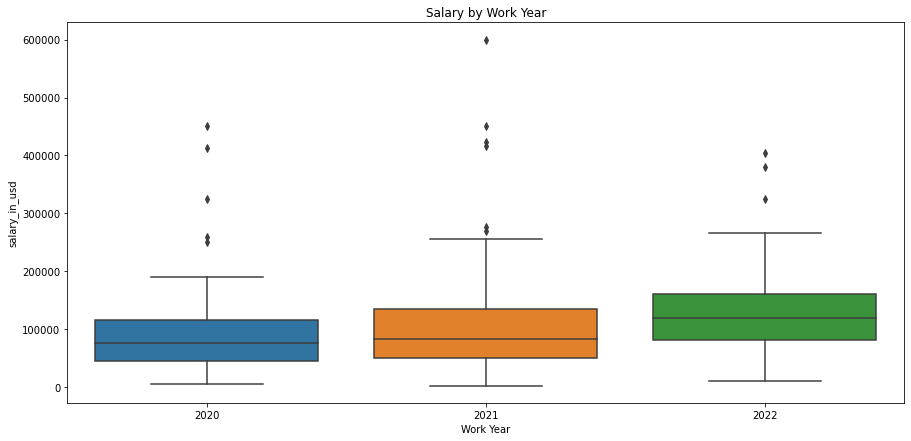

In [101]:
plt.figure(figsize=(15,7))
plt.title('Salary by Work Year')
sns.boxplot(data=df_salaries,x='work_year',y='salary_in_usd')
plt.xlabel('Work Year')
plt.show()


From both charts, we can see that each year, the mean amount paid increases i.e. from below 100,000 USD in 2020 to around 150,000 USD in 2022. However, higher salaries were paid in 2021 overall.

#### Average Salary by Expereince Level

Text(0.5, 1.0, 'Salary Analysis by Experience Level')

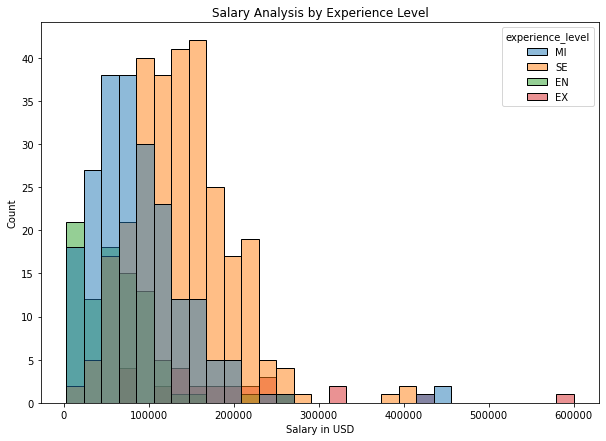

In [45]:
plt.figure(figsize=(10,7))
sns.histplot(data=df_salaries,x='salary_in_usd', hue ='experience_level')
plt.xlabel('Salary in USD')
plt.title('Salary Analysis by Experience Level')

From the data, it seems like the most frequent experience level is the Senior (SE) and the Mid-Level (ML). For the SE, Salary ranges between 90,000 USD up to 290,000 USD with majority earning around 150,000 USD and some outliers at 400,000 USD. Mid-Level employees earn between 25,000 USD and 90,000 USD with some outliers at 450,000 USD. For Executive Level (EX), salary ranges sparsely between 320,000 USD and 580,000 USD.  

#### Average Salary by Company Size

Text(0, 0.5, 'Salary in USD')

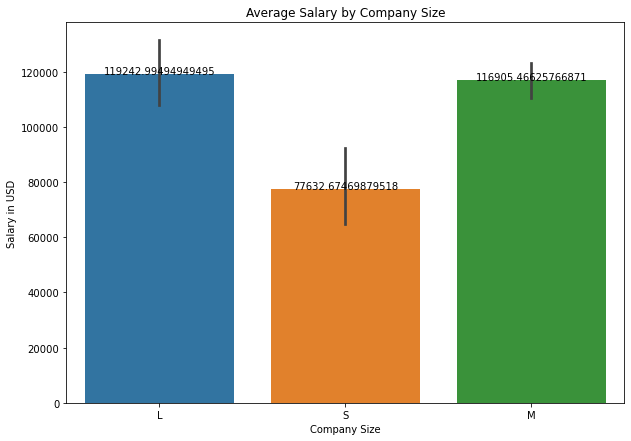

In [130]:
plt.figure(figsize=(10,7))
plt.title('Average Salary by Company Size')
viz=sns.barplot(data=df_salaries,x='company_size',y='salary_in_usd')
viz.set_xticklabels(viz.get_xticklabels())
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")


plt.xlabel('Company Size')
plt.ylabel('Salary in USD')

Large and Medium Size companies have a competing average pay. However, Large organisations win by 3,000USD higher average pay. An important question to ask is if the 3,000USD difference is worth choosing to work at a large company over other benefits such as more flexibility, incrased access to management and more room to be recognised that can be enjoyed at a medium sized company.

#### Average Salary by Job Title

Text(0, 0.5, 'Job Titles')

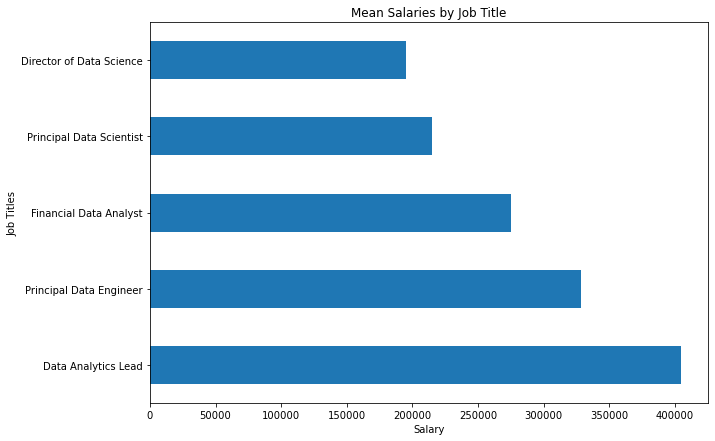

In [44]:
df_salaries.groupby ('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head().plot.barh(stacked=True, rot=0, figsize = (10,7))
plt.title('Mean Salaries by Job Title')
plt.xlabel('Salary')
plt.ylabel('Job Titles')

We can see that Data Analytics Lead earns the highest with a mean of 400,000 USD. This is followed by Principal Data Engineers with a mean pay of about 325,000 USD which is about 18% less. Something similar can be seen in the difference of average pay between a Principal Data Engineer and Financial Data Analyst, etc.

#### Average Salary by Company Location

Text(0, 0.5, 'Location')

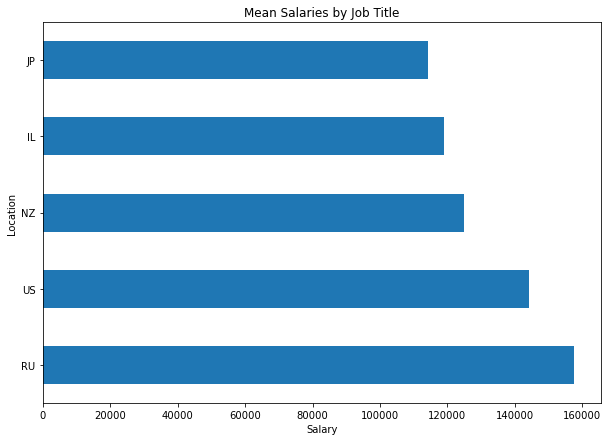

In [43]:
df_salaries.groupby ('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head().plot.barh(stacked=True, rot=0, figsize = (10,7))
plt.title('Mean Salaries by Job Title')
plt.xlabel('Salary')
plt.ylabel('Location')

Here we can see that Russia has the highest mean salary with a mean salary around 157,000 USD. This is closely followed by the USA with a mean salary of around 145,000 USD.